In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Roadmap:
# 1. Create polynomial features
# 2. Build elastic net and find best tuning with gridsearch
# 4. evaluate with cross-validation
# 5. train final model and evaluate final RMSE
# 6. predict house prices of the provided test set

In [3]:
df = pd.read_csv('data/training_set_without_outliers.csv')
df_test = pd.read_csv('data/preprocessed_test_set.csv')

In [4]:
# train test split for polynomial and linear features
from sklearn.model_selection import train_test_split

X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.linear_model import ElasticNet

base_elastic_net_model = ElasticNet(max_iter=100000)

alpha_params = (np.linspace(.1, 100, 100)).tolist()
l1_ratio_params = (np.linspace(1, 100, 99)/100).tolist()

param_grid = {'alpha': alpha_params, 'l1_ratio': l1_ratio_params}
param_grid

{'alpha': [0.1,
  1.1090909090909091,
  2.118181818181818,
  3.1272727272727274,
  4.136363636363636,
  5.145454545454545,
  6.154545454545454,
  7.163636363636363,
  8.172727272727272,
  9.181818181818182,
  10.19090909090909,
  11.2,
  12.209090909090909,
  13.218181818181817,
  14.227272727272727,
  15.236363636363635,
  16.245454545454546,
  17.254545454545454,
  18.263636363636365,
  19.272727272727273,
  20.28181818181818,
  21.290909090909093,
  22.3,
  23.30909090909091,
  24.31818181818182,
  25.327272727272728,
  26.336363636363636,
  27.345454545454544,
  28.354545454545455,
  29.363636363636363,
  30.37272727272727,
  31.381818181818183,
  32.39090909090909,
  33.4,
  34.40909090909091,
  35.418181818181814,
  36.42727272727273,
  37.43636363636364,
  38.445454545454545,
  39.45454545454545,
  40.46363636363636,
  41.47272727272727,
  42.481818181818184,
  43.49090909090909,
  44.5,
  45.50909090909091,
  46.518181818181816,
  47.527272727272724,
  48.53636363636364,
  49.5

In [7]:
from sklearn.model_selection import RandomizedSearchCV

grid_model = RandomizedSearchCV(base_elastic_net_model, param_grid, scoring='neg_mean_squared_error', n_iter=5000, n_jobs=8, cv=5, verbose=1)

In [8]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.874e+09, tolerance: 4.375e+08
  model = cd_fast.enet_coordinate_descent(


RandomizedSearchCV(cv=5, estimator=ElasticNet(max_iter=100000), n_iter=5000,
                   n_jobs=8,
                   param_distributions={'alpha': [0.1, 1.1090909090909091,
                                                  2.118181818181818,
                                                  3.1272727272727274,
                                                  4.136363636363636,
                                                  5.145454545454545,
                                                  6.154545454545454,
                                                  7.163636363636363,
                                                  8.172727272727272,
                                                  9.181818181818182,
                                                  10.19090909090909, 11.2,
                                                  12.209090909090909,
                                                  13.218181818181817,
                                                  14.22727...
                                                     0.1514285714285714,
                                                     0.16153061224489795,
                                                     0.17163265306122447,
                                                     0.181734693877551,
                                                     0.19183673469387752,
                                                     0.20193877551020406,
                                                     0.21204081632653057,
                                                     0.22214285714285711,
                                                     0.23224489795918365,
                                                     0.24234693877551017,
                                                     0.2524489795918367,
                                                     0.26255102040816325,
                                                     0.27265306122448973,
                                                     0.28275510204081633,
                                                     0.29285714285714287,
                                                     0.30295918367346936, ...]},
                   scoring='neg_mean_squared_error', verbose=1)

In [9]:
# Explore better around best estimator parameters

In [10]:
base_elastic_net_model = ElasticNet(max_iter=100000)

alpha_params = (np.linspace(5, 15, 50)).tolist()
l1_ratio_params = (np.linspace(90, 99, 50)/100).tolist()

param_grid = {'alpha': alpha_params, 'l1_ratio': l1_ratio_params}
param_grid

{'alpha': [5.0,
  5.204081632653061,
  5.408163265306122,
  5.612244897959184,
  5.816326530612245,
  6.020408163265306,
  6.224489795918368,
  6.428571428571429,
  6.63265306122449,
  6.836734693877551,
  7.040816326530612,
  7.244897959183674,
  7.448979591836735,
  7.653061224489796,
  7.857142857142858,
  8.061224489795919,
  8.26530612244898,
  8.46938775510204,
  8.673469387755102,
  8.877551020408163,
  9.081632653061224,
  9.285714285714285,
  9.489795918367347,
  9.693877551020408,
  9.89795918367347,
  10.10204081632653,
  10.306122448979592,
  10.510204081632654,
  10.714285714285715,
  10.918367346938776,
  11.122448979591837,
  11.326530612244898,
  11.53061224489796,
  11.73469387755102,
  11.938775510204081,
  12.142857142857142,
  12.346938775510203,
  12.551020408163264,
  12.755102040816327,
  12.959183673469388,
  13.16326530612245,
  13.36734693877551,
  13.571428571428571,
  13.775510204081632,
  13.979591836734695,
  14.183673469387756,
  14.387755102040817,
  14.

In [11]:
grid_model = RandomizedSearchCV(base_elastic_net_model, param_grid, scoring='neg_mean_squared_error', n_iter=1000, n_jobs=8, cv=10, verbose=1)

In [12]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


RandomizedSearchCV(cv=10, estimator=ElasticNet(max_iter=100000), n_iter=1000,
                   n_jobs=8,
                   param_distributions={'alpha': [5.0, 5.204081632653061,
                                                  5.408163265306122,
                                                  5.612244897959184,
                                                  5.816326530612245,
                                                  6.020408163265306,
                                                  6.224489795918368,
                                                  6.428571428571429,
                                                  6.63265306122449,
                                                  6.836734693877551,
                                                  7.040816326530612,
                                                  7.244897959183674,
                                                  7.448979591836735,
                                                  7.653061224489796...
                                                     0.9257142857142857,
                                                     0.9275510204081633,
                                                     0.9293877551020409,
                                                     0.9312244897959183,
                                                     0.9330612244897959,
                                                     0.9348979591836735,
                                                     0.936734693877551,
                                                     0.9385714285714286,
                                                     0.9404081632653062,
                                                     0.9422448979591838,
                                                     0.9440816326530613,
                                                     0.9459183673469389,
                                                     0.9477551020408163,
                                                     0.9495918367346938,
                                                     0.9514285714285714,
                                                     0.953265306122449, ...]},
                   scoring='neg_mean_squared_error', verbose=1)

In [13]:
grid_model.best_estimator_

ElasticNet(alpha=8.673469387755102, l1_ratio=0.99, max_iter=100000)

In [14]:
# Look at the mean squared error

from sklearn.metrics import mean_squared_error
y_pred_grid = grid_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred_grid))

21351.600574960707

In [15]:
# Check residuals after test, they should be distributed across zero

residuals = y_pred_grid - y_test
residuals

353     11213.494297
864     -4343.543669
1311    -6089.349286
192    -12034.100972
782    -14621.038547
            ...     
1001   -40777.399821
610    -12350.685691
188     -5052.613586
289     29472.122817
890     16314.962990
Name: SalePrice, Length: 282, dtype: float64

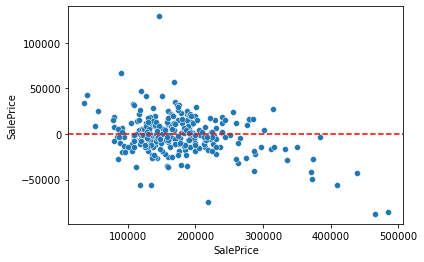

In [16]:
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', ls='--')

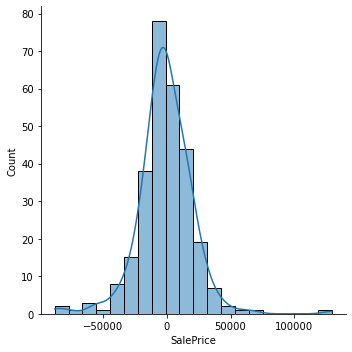

In [17]:
# If linear regression is working fine, we should get a normal distribution

sns.displot(residuals, bins=20, kde=True)

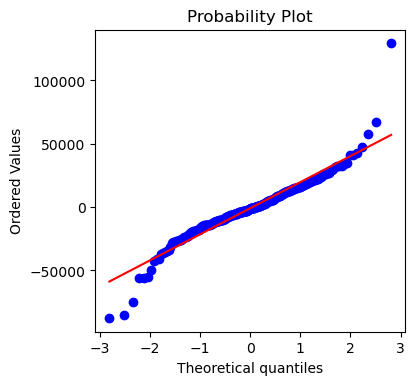

In [18]:
import scipy as sp

fig, ax = plt.subplots(figsize=(4,4), dpi=100)
_ = sp.stats.probplot(residuals, plot=ax)

In [19]:
# Our best model is ElasticNet with alpha=8.46 and l1_ratio=0.99
# Build final model and test it

final_model = ElasticNet(alpha=8.46, l1_ratio=0.99, max_iter=100000)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

final_model.fit(X, y)

ElasticNet(alpha=8.46, l1_ratio=0.99, max_iter=100000)

In [20]:
# Dump final model for next step

import pickle

pickle.dump(final_model, open('model/final_model.ml', 'wb'))